In [1]:
import longi_class as lc
import analysis_functions as af
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

import plotting_functions as pf

In [2]:
males= sorted(['4145','4146','4140', '4139', '4142', '4143'])
females = sorted(['4136','784','4096','4148','4144','4147'])

animal_order = males+females

names = af.assemble_names('/home/dprotter/Downloads/Sex_Differences_CSV')
sum_files = [file for file in sorted(names) if 'summary' in file]

In [3]:
f = '/home/dprotter/Downloads/Sex_Differences_CSV/6_14_2021__7_52__Magazine_vole_4140.csv'
with open(f) as file:
    dat = [line for line in file]

['vole:4140',
 'day:1',
 'experiment:Magazine',
 'user:nan',
 'output_directory:/home/pi/Desktop/Sex_Differences_cohort_1/daily_output/',
 'date:6/14/2021',
 'done:False',
 'experiment_status:nan',
 'rounds:20',
 'rounds_completed:nan',
 'run_time:6_14_2021__7_52_',
 'script:Magazine',
 '\n']

In [4]:
lon_ana = lc.LongitudinalAnalysis('all_exp')
for f in sum_files:
    lon_ana.add_summary_csv(f)

rue)
  File "/home/dprotter/.local/lib/python3.8/site-packages/pandas/core/dtypes/cast.py", line 966, in astype_nansafe
    return lib.astype_intsafe(arr.ravel(), dtype).reshape(arr.shape)
  File "pandas/_libs/lib.pyx", line 617, in pandas._libs.lib.astype_intsafe
ValueError: invalid literal for int() with base 10: '1.0'
/home/dprotter/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
Traceback (most recent call last):
  File "/home/dprotter/Documents/Vole Projects/Operant_Daily_Pipeline/longi_class.py", line 90, in add_summary_csv
    metric.add_data(new_row)
  File "/home/dprotter/Documents/Vole Projects/Operant_Daily_Pipeline/longi_class.py", line 189, in add_data
    self.data = self.data.astype({'value':self.data_type, 'day':int})
  File "/home/dprotter/.local/lib/python3.8/site-packages/pandas/core/generic.py",

In [5]:
mets = lon_ana.metrics

In [6]:
mets

{'rounds': <longi_class.Metric at 0x7fc28c15feb0>,
 'total_lever_press': <longi_class.Metric at 0x7fc25edb2e80>,
 'non_press_rounds': <longi_class.Metric at 0x7fc28c16b5e0>,
 'prop_non_presses_by_rounds': <longi_class.Metric at 0x7fc28c164ac0>,
 'percent_food_presses': <longi_class.Metric at 0x7fc25e9251c0>,
 'mean_food_lever_press_latency': <longi_class.Metric at 0x7fc25e9252b0>,
 'median_food_lever_press_latency': <longi_class.Metric at 0x7fc25e925340>,
 'mean_pellet_latency': <longi_class.Metric at 0x7fc25e9254c0>,
 'median_pellet_latency': <longi_class.Metric at 0x7fc25e925640>,
 'num_pellet_retrieved': <longi_class.Metric at 0x7fc25e9257c0>,
 'proportion_round_pellet_retrieved': <longi_class.Metric at 0x7fc25e925940>,
 'proportion_pellet_retrieved': <longi_class.Metric at 0x7fc25e925ac0>,
 'animal_ID': <longi_class.Metric at 0x7fc25e925c40>,
 'day': <longi_class.Metric at 0x7fc25e925f40>,
 'experiment': <longi_class.Metric at 0x7fc25e92c250>,
 'date': <longi_class.Metric at 0x7fc2

In [7]:
lon_ana.animal_order = animal_order

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/home/dprotter/anaconda3/envs/computing/lib/python3.8/site-packages/numpy/ma/core.py:722: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)
<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/home/dprotter/anaconda3/envs/computing/lib/python3.8/site-packages/numpy/ma/core.py:722: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)
<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/home/dprotter/anaconda3/envs/computing/lib/python3.8/site-packages/numpy/ma/core.py:722: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)
<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/home/dprotter/anaconda3/envs/computing/lib/python

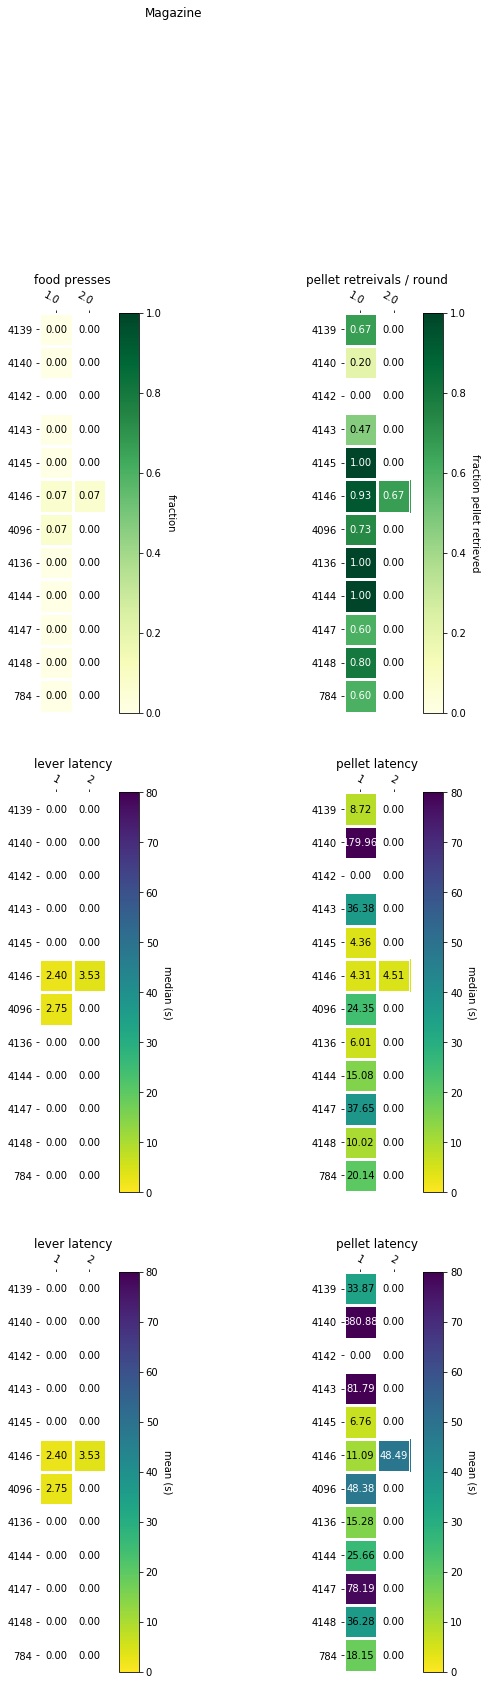

In [8]:
if 'Magazine' in lon_ana.experiments:

    metric = 'percent_food_presses'
    experiment = 'Magazine'

    fig, axs = plt.subplots(ncols = 2, nrows = 3, figsize = (10,25)) 


    ani, days, vals = lon_ana.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'food presses', cbarlabel = 'fraction', ax = axs[0,0])

    metric = 'proportion_round_pellet_retrieved'
    ani, days, vals = lon_ana.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'pellet retreivals / round', cbarlabel = 'fraction pellet retrieved', ax = axs[0,1])



    cmap_r = plt.cm.get_cmap('viridis').reversed()
    metric = 'median_food_lever_press_latency'
    ani, days, vals = lon_ana.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'lever latency', cbarlabel = 'median (s)', ax = axs[1,0], 
                        cmap = cmap_r, val_ceil = 80, val_floor = 0)


    metric = 'median_pellet_latency'
    ani, days, vals = lon_ana.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'pellet latency', cbarlabel = 'median (s)', ax = axs[1,1], 
                        cmap = cmap_r, val_ceil = 80, val_floor = 0)
    fig.suptitle(experiment, y = 1.05)


    cmap_r = plt.cm.get_cmap('viridis').reversed()
    metric = 'mean_food_lever_press_latency'
    ani, days, vals = lon_ana.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'lever latency', cbarlabel = 'mean (s)', ax = axs[2,0], 
                        cmap = cmap_r, val_ceil = 80, val_floor = 0)



    metric = 'mean_pellet_latency'
    ani, days, vals = lon_ana.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'pellet latency', cbarlabel = 'mean (s)', ax = axs[2,1], 
                        cmap = cmap_r, val_ceil = 80, val_floor = 0)
    fig.suptitle(experiment, y = 1.05)

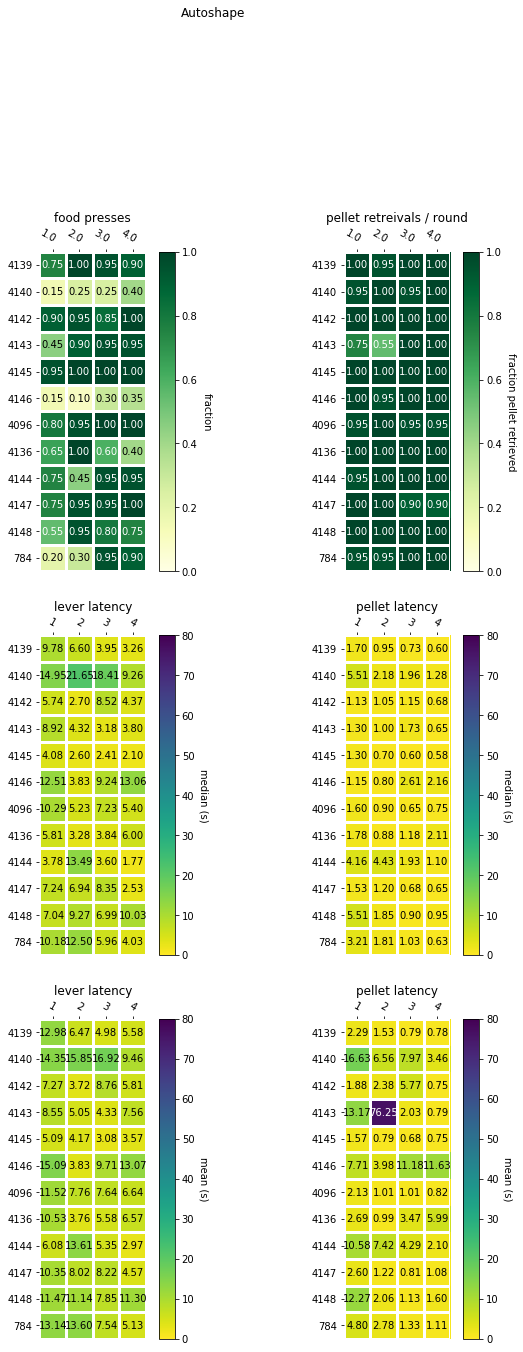

In [9]:

if 'Autoshape' in lon_ana.experiments:

    metric = 'percent_food_presses'
    experiment = 'Autoshape'

    fig, axs = plt.subplots(ncols = 2, nrows = 3, figsize = (10,20)) 


    ani, days, vals = lon_ana.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'food presses', cbarlabel = 'fraction', ax = axs[0,0])

    metric = 'proportion_round_pellet_retrieved'
    ani, days, vals = lon_ana.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'pellet retreivals / round', cbarlabel = 'fraction pellet retrieved', ax = axs[0,1])



    cmap_r = plt.cm.get_cmap('viridis').reversed()
    metric = 'median_food_lever_press_latency'
    ani, days, vals = lon_ana.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'lever latency', cbarlabel = 'median (s)', ax = axs[1,0], 
                        cmap = cmap_r, val_ceil = 80, val_floor = 0)


    metric = 'median_pellet_latency'
    ani, days, vals = lon_ana.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'pellet latency', cbarlabel = 'median (s)', ax = axs[1,1], 
                        cmap = cmap_r, val_ceil = 80, val_floor = 0)
    fig.suptitle(experiment, y = 1.05)


    cmap_r = plt.cm.get_cmap('viridis').reversed()
    metric = 'mean_food_lever_press_latency'
    ani, days, vals = lon_ana.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'lever latency', cbarlabel = 'mean (s)', ax = axs[2,0], 
                        cmap = cmap_r, val_ceil = 80, val_floor = 0)



    metric = 'mean_pellet_latency'
    ani, days, vals = lon_ana.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'pellet latency', cbarlabel = 'mean (s)', ax = axs[2,1], 
                        cmap = cmap_r, val_ceil = 80, val_floor = 0)
    fig.suptitle(experiment, y = 1.05)

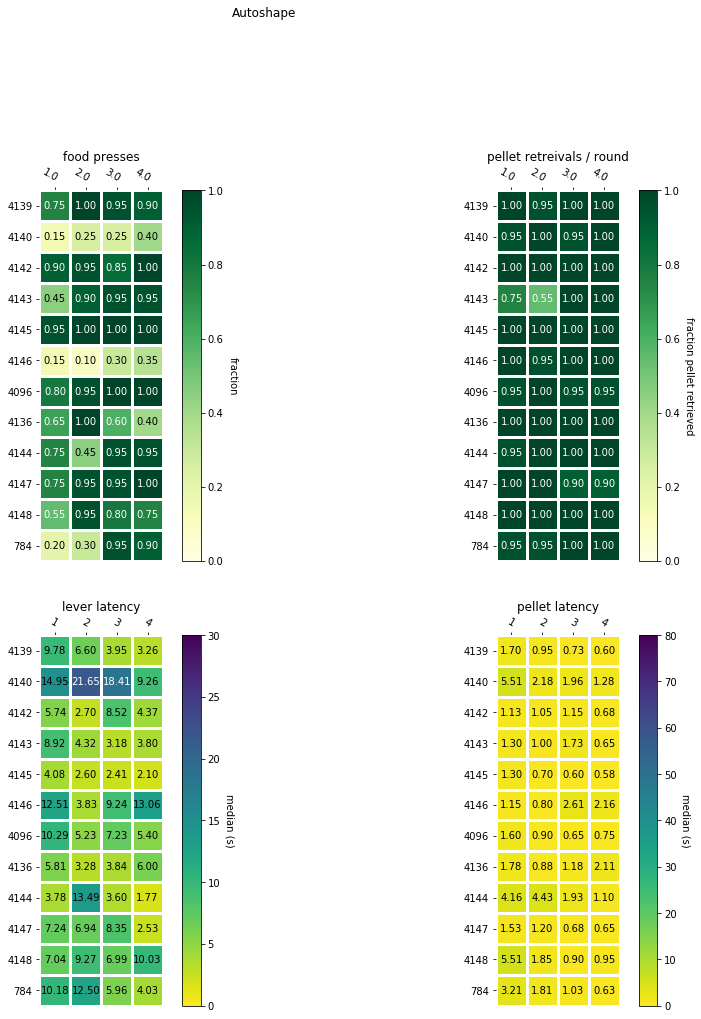

In [10]:
if 'Autoshape' in lon_ana.experiments:
    metric = 'percent_food_presses'
    experiment = 'Autoshape'

    fig, axs = plt.subplots(ncols = 2, nrows = 2, figsize = (15,15)) 


    ani, days, vals = lon_ana.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'food presses', cbarlabel = 'fraction', ax = axs[0,0])

    metric = 'proportion_round_pellet_retrieved'
    ani, days, vals = lon_ana.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'pellet retreivals / round', cbarlabel = 'fraction pellet retrieved', ax = axs[0,1])

    cmap_r = plt.cm.get_cmap('viridis').reversed()
    metric = 'median_food_lever_press_latency'
    ani, days, vals = lon_ana.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'lever latency', cbarlabel = 'median (s)', ax = axs[1,0], 
                        cmap = cmap_r, val_ceil = 30, val_floor = 0)


    metric = 'median_pellet_latency'
    ani, days, vals = lon_ana.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'pellet latency', cbarlabel = 'median (s)', ax = axs[1,1], 
                        cmap = cmap_r, val_ceil = 80, val_floor = 0)
    fig.suptitle(experiment, y = 1.05)

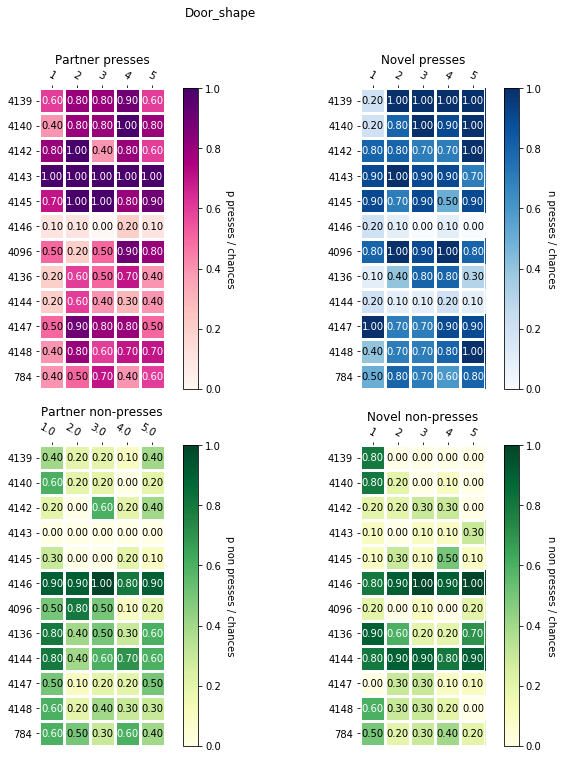

In [11]:

if 'Door_shape' in lon_ana.experiments:
    metric = 'door_1_lever_press_round_proportion'
    experiment = 'Door_shape'

    fig, axs = plt.subplots(ncols = 2, nrows = 2, figsize = (10, 10))

    ani, days, vals = lon_ana.get_data(metric, experiment = experiment, dataset = lon_ana)
    a = pf.make_heatmap(vals, ani, days, ax = axs[0,0],
                        title = "Partner presses", 
                        cbarlabel = 'p presses / chances',
                        cmap = 'RdPu')

    metric = 'door_2_lever_press_round_proportion'
    experiment = 'Door_shape'
    ani, days, vals = lon_ana.get_data(metric, experiment = experiment, dataset = lon_ana)
    a = pf.make_heatmap(vals, ani, days, ax = axs[0,1],
                        title = "Novel presses", 
                        cbarlabel = 'n presses / chances',
                        cmap = 'Blues')

    metric = 'door_1_non_press_round_proportion'
    experiment = 'Door_shape'
    ani, days, vals = lon_ana.get_data(metric, experiment = experiment, dataset = lon_ana)
    a = pf.make_heatmap(vals, ani, days, ax = axs[1,0],
                        title = "Partner non-presses", 
                        cbarlabel = 'p non presses / chances',
                        cmap = 'YlGn')

    metric = 'door_2_non_press_round_proportion'
    experiment = 'Door_shape'
    ani, days, vals = lon_ana.get_data(metric, experiment = experiment, dataset = lon_ana)
    a = pf.make_heatmap(vals, ani, days, ax = axs[1,1],
                        title = "Novel non-presses", 
                        cbarlabel = 'n non presses / chances',
                        cmap = 'YlGn')

    fig.suptitle(experiment, y = 1.05)
    fig.tight_layout()

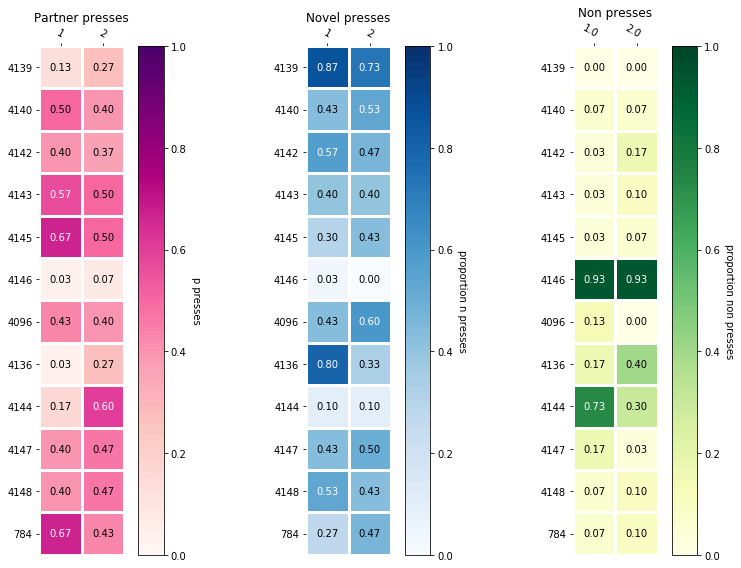

In [12]:
if 'Door_test' in lon_ana.experiments:
    metric = 'door_1_lever_press_round_proportion'
    experiment = 'Door_test'

    fig, axs = plt.subplots(ncols = 3, figsize = (12,8))

    ani, days, vals = lon_ana.get_data(metric, experiment = experiment, dataset = lon_ana)
    a = pf.make_heatmap(vals, ani, days, ax = axs[0],
                        title = "Partner presses", 
                        cbarlabel = 'p presses',
                        cmap = 'RdPu', val_floor = 0, val_ceil = 1)

    metric = 'door_2_lever_press_round_proportion'
    experiment = 'Door_test'
    ani, days, vals = lon_ana.get_data(metric, experiment = experiment, dataset = lon_ana)
    a = pf.make_heatmap(vals, ani, days, ax = axs[1],
                        title = "Novel presses", 
                        cbarlabel = 'proportion n presses',
                        cmap = 'Blues')

    metric = 'prop_non_presses_by_rounds'
    experiment = 'Door_test'
    ani, days, vals = lon_ana.get_data(metric, experiment = experiment, dataset = lon_ana)
    a = pf.make_heatmap(vals, ani, days, ax = axs[2],
                        title = "Non presses", 
                        cbarlabel = 'proportion non presses',
                        cmap = 'YlGn')
    fig.tight_layout()

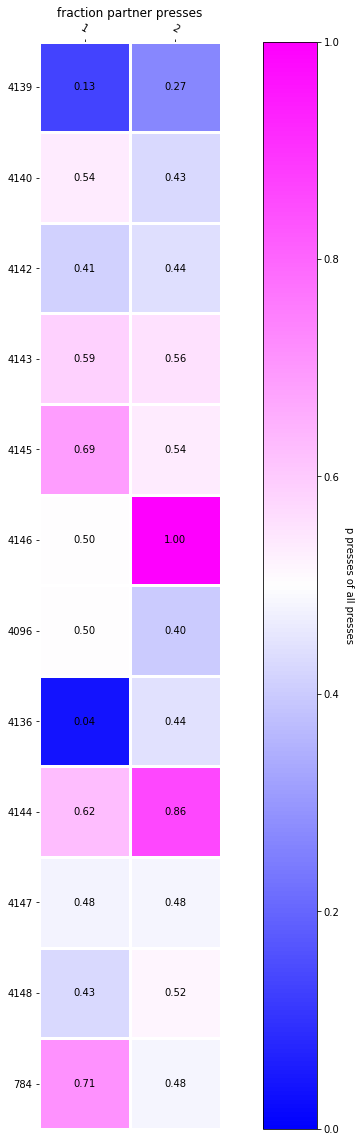

In [13]:
if 'Door_test' in lon_ana.experiments:
    metric = 'door_1_lever_press_total_press_proportion'
    experiment = 'Door_test'

    cmap = pf.get_continuous_cmap(['#0000FF','#FFFFFF','#ff00ff'])


    fig, ax = plt.subplots(figsize = (15,20))

    ani, days, vals = lon_ana.get_data(metric, experiment = experiment, dataset = lon_ana)
    a = pf.make_heatmap(vals, ani, days, ax = ax,
                        title = "fraction partner presses", 
                        cbarlabel = 'p presses of all presses',
                        cmap = cmap, val_floor = 0, val_ceil = 1, threshold = 1)

In [14]:
mets

{'rounds': <longi_class.Metric at 0x7fc28c15feb0>,
 'total_lever_press': <longi_class.Metric at 0x7fc25edb2e80>,
 'non_press_rounds': <longi_class.Metric at 0x7fc28c16b5e0>,
 'prop_non_presses_by_rounds': <longi_class.Metric at 0x7fc28c164ac0>,
 'percent_food_presses': <longi_class.Metric at 0x7fc25e9251c0>,
 'mean_food_lever_press_latency': <longi_class.Metric at 0x7fc25e9252b0>,
 'median_food_lever_press_latency': <longi_class.Metric at 0x7fc25e925340>,
 'mean_pellet_latency': <longi_class.Metric at 0x7fc25e9254c0>,
 'median_pellet_latency': <longi_class.Metric at 0x7fc25e925640>,
 'num_pellet_retrieved': <longi_class.Metric at 0x7fc25e9257c0>,
 'proportion_round_pellet_retrieved': <longi_class.Metric at 0x7fc25e925940>,
 'proportion_pellet_retrieved': <longi_class.Metric at 0x7fc25e925ac0>,
 'animal_ID': <longi_class.Metric at 0x7fc25e925c40>,
 'day': <longi_class.Metric at 0x7fc25e925f40>,
 'experiment': <longi_class.Metric at 0x7fc25e92c250>,
 'date': <longi_class.Metric at 0x7fc2

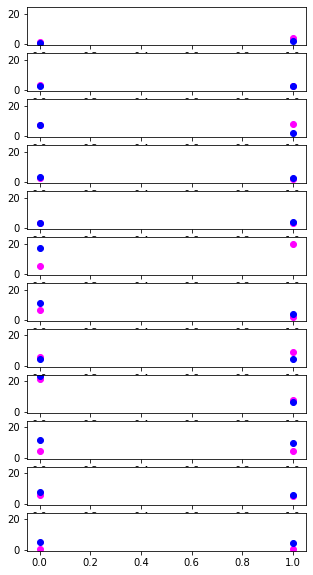

In [15]:
metric = 'median_door_1_lever_press_latency'
experiment = 'Door_test'

ani, days, vals = lon_ana.get_data(metric, experiment = experiment, dataset = lon_ana)

metric = 'median_door_2_lever_press_latency'
experiment = 'Door_test'

ani2, days2, vals2 = lon_ana.get_data(metric, experiment = experiment, dataset = lon_ana)

fig, ax = plt.subplots(nrows = 12, sharey = True, figsize = (5, 10))
for a, data1, data2 in zip(ax.ravel(), vals, vals2):
    a.plot(data1, 'o', color = '#ff00ff')
    a.plot(data2, 'o', color = 'blue')

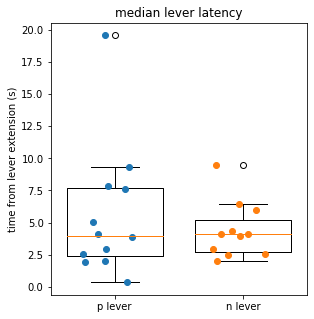

In [59]:
import random

fig, ax = plt.subplots(figsize = (5,5))
ax.boxplot([vals[:,1], vals2[:,1][~np.isnan(vals2[:,1])]], widths = 0.75)
ax.set_xticklabels(('p lever', 'n lever'))
ax.set_title("median lever latency")
ax.set_ylabel('time from lever extension (s)')

xs = [(0.5 - random.random())/2 + 1 for _ in range(12)]
ax.plot(xs, vals[:,1], 'o')

xs = [(0.5 - random.random())/2 + 2 for _ in range(12)]
ax.plot(xs, vals2[:,1], 'o')

ax.set_aspect(0.1)

Text(0, 0.5, 'n lever latency (s)')

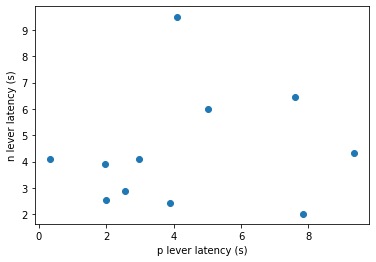

In [63]:
plt.scatter(vals[:,1], vals2[:,1])
plt.xlabel('p lever latency (s)')
plt.ylabel('n lever latency (s)')

In [65]:
vals2[:,1]

array([2.441389 , 2.905457 , 2.031712 , 2.549129 , 4.112076 ,       nan,
       3.9177165, 4.320805 , 6.451864 , 9.501047 , 6.00735  , 4.108839 ])

In [19]:
df = lon_ana.metrics['median_door_1_lever_press_latency'].data

In [20]:
df.loc[(df.experiment == 'Door_test')&(df.day == 2)]

,animal,day,value,experiment,file
77,4096,2,1.962875,Door_test,/home/dprotter/Downloads/Sex_Differences_CSV/7...
81,4136,2,9.351844,Door_test,/home/dprotter/Downloads/Sex_Differences_CSV/7...
84,4139,2,3.879246,Door_test,/home/dprotter/Downloads/Sex_Differences_CSV/7...
75,4140,2,2.562461,Door_test,/home/dprotter/Downloads/Sex_Differences_CSV/7...
78,4142,2,7.846687,Door_test,/home/dprotter/Downloads/Sex_Differences_CSV/7...
80,4143,2,1.996853,Door_test,/home/dprotter/Downloads/Sex_Differences_CSV/7...
73,4144,2,7.596739,Door_test,/home/dprotter/Downloads/Sex_Differences_CSV/7...
76,4145,2,2.969147,Door_test,/home/dprotter/Downloads/Sex_Differences_CSV/7...
82,4146,2,19.586366,Door_test,/home/dprotter/Downloads/Sex_Differences_CSV/7...
74,4147,2,4.089413,Door_test,/home/dprotter/Downloads/Sex_Differences_CSV/7...
